# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


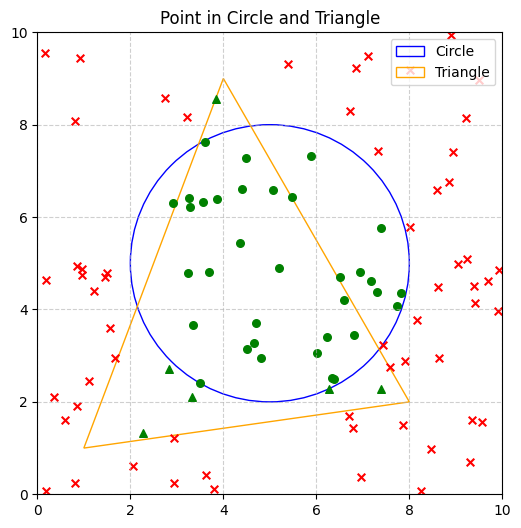

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import random

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __str__(self):
        return f"Point({self.x:.2f}, {self.y:.2f})"

class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
    def point_in_circle(self, p):
        return (p.x - self.center.x)**2 + (p.y - self.center.y)**2 <= self.radius**2

class Triangle:
    def __init__(self, p1, p2, p3):
        self.p1, self.p2, self.p3 = p1, p2, p3
    def point_in_triangle(self, p):
        def sign(p1, p2, p3):
            return (p1.x - p3.x) * (p2.y - p3.y) - (p2.x - p3.x) * (p1.y - p3.y)
        d1 = sign(p, self.p1, self.p2)
        d2 = sign(p, self.p2, self.p3)
        d3 = sign(p, self.p3, self.p1)
        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)
        return not (has_neg and has_pos)

def generate_points(xmin, xmax, ymin, ymax, n):
    return [Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax)) for _ in range(n)]

circle = Circle(Point(5, 5), 3)
triangle = Triangle(Point(1, 1), Point(8, 2), Point(4, 9))
points = generate_points(0, 10, 0, 10, 100)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 10); ax.set_ylim(0, 10)

ax.add_patch(plt.Circle((circle.center.x, circle.center.y), circle.radius, color='blue', fill=False, label='Circle'))
ax.add_patch(plt.Polygon([(p.x, p.y) for p in [triangle.p1, triangle.p2, triangle.p3]], color='orange', fill=False, label='Triangle'))

for p in points:
    in_c = circle.point_in_circle(p)
    in_t = triangle.point_in_triangle(p)
    color = 'green' if in_c or in_t else 'red'
    marker = 'o' if in_c else ('^' if in_t else 'x')
    ax.scatter(p.x, p.y, color=color, marker=marker, s=30)

plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Point in Circle and Triangle")
plt.show()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


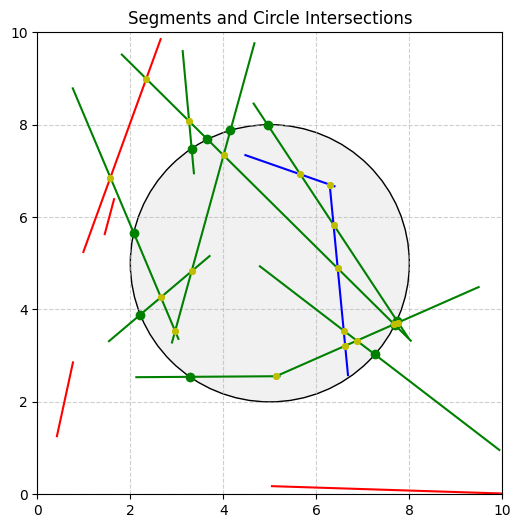

In [21]:
class Segment:
    def __init__(self, p1, p2):
        self.p1, self.p2 = p1, p2
    def __str__(self):
        return f"Segment({self.p1}, {self.p2})"
    def length(self):
        return np.sqrt((self.p1.x - self.p2.x)**2 + (self.p1.y - self.p2.y)**2)
    
    def intersects_circle(self, circle):
        dx, dy = self.p2.x - self.p1.x, self.p2.y - self.p1.y
        fx, fy = self.p1.x - circle.center.x, self.p1.y - circle.center.y
        a = dx**2 + dy**2
        b = 2 * (fx * dx + fy * dy)
        c = (fx**2 + fy**2) - circle.radius**2
        discriminant = b**2 - 4*a*c
        points = []
        if discriminant >= 0:
            discriminant = np.sqrt(discriminant)
            t1, t2 = (-b - discriminant) / (2*a), (-b + discriminant) / (2*a)
            if 0 <= t1 <= 1: points.append(Point(self.p1.x + t1 * dx, self.p1.y + t1 * dy))
            if 0 <= t2 <= 1: points.append(Point(self.p1.x + t2 * dx, self.p1.y + t2 * dy))
        return points

    def intersects_segment(self, other):
        def ccw(A, B, C): return (C.y - A.y) * (B.x - A.x) > (B.y - A.y) * (C.x - A.x)
        A, B, C, D = self.p1, self.p2, other.p1, other.p2
        if ccw(A, C, D) != ccw(B, C, D) and ccw(A, B, C) != ccw(A, B, D):
            xdiff = (self.p1.x - self.p2.x, other.p1.x - other.p2.x)
            ydiff = (self.p1.y - self.p2.y, other.p1.y - other.p2.y)
            def det(a, b): return a[0] * b[1] - a[1] * b[0]
            div = det(xdiff, ydiff)
            if div == 0: return None
            d = (det((self.p1.x, self.p1.y), (self.p2.x, self.p2.y)), det((other.p1.x, other.p1.y), (other.p2.x, other.p2.y)))
            x = det(d, xdiff) / div
            y = det(d, ydiff) / div
            return Point(x, y)
        return None

def generate_segments(n, xmin, xmax, ymin, ymax):
    return [Segment(Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax)), 
                    Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))) for _ in range(n)]

segments = generate_segments(15, 0, 10, 0, 10)
intersection_points = []

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 10); ax.set_ylim(0, 10)
ax.add_patch(plt.Circle((circle.center.x, circle.center.y), circle.radius, color='lightgray', alpha=0.3))
ax.add_patch(plt.Circle((circle.center.x, circle.center.y), circle.radius, color='black', fill=False))

for seg in segments:
    circle_ints = seg.intersects_circle(circle)
    d1 = (seg.p1.x - circle.center.x)**2 + (seg.p1.y - circle.center.y)**2
    d2 = (seg.p2.x - circle.center.x)**2 + (seg.p2.y - circle.center.y)**2
    is_inside = d1 <= circle.radius**2 and d2 <= circle.radius**2
    
    color = 'green' if circle_ints else ('blue' if is_inside else 'red')
    ax.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], color=color)
    for p in circle_ints: ax.plot(p.x, p.y, 'go')
    
    for other in segments:
        if seg == other: continue
        p = seg.intersects_segment(other)
        if p: intersection_points.append(p)

for p in intersection_points: ax.plot(p.x, p.y, 'y.', markersize=8)

plt.title("Segments and Circle Intersections")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


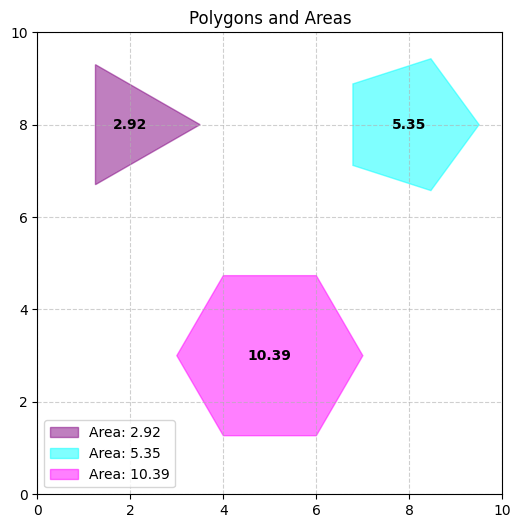

In [22]:
class Polygon:
    def __init__(self, vertices):
        self.vertices = vertices
    def __str__(self):
        return f"Polygon({len(self.vertices)} vertices)"
    def area(self):
        n = len(self.vertices)
        area = 0.0
        for i in range(n):
            j = (i + 1) % n
            area += self.vertices[i].x * self.vertices[j].y
            area -= self.vertices[j].x * self.vertices[i].y
        return abs(area) / 2.0
    def centroid(self):
        return Point(sum(p.x for p in self.vertices)/len(self.vertices), sum(p.y for p in self.vertices)/len(self.vertices))

def generate_regular_polygon(sides, center, radius):
    return Polygon([Point(center.x + radius * np.cos(2*np.pi*i/sides), center.y + radius * np.sin(2*np.pi*i/sides)) for i in range(sides)])

polygons = [generate_regular_polygon(3, Point(2, 8), 1.5), generate_regular_polygon(5, Point(8, 8), 1.5), generate_regular_polygon(6, Point(5, 3), 2.0)]
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 10); ax.set_ylim(0, 10)
colors = ['purple', 'cyan', 'magenta']

for i, poly in enumerate(polygons):
    ax.add_patch(plt.Polygon([(p.x, p.y) for p in poly.vertices], color=colors[i], alpha=0.5, label=f"Area: {poly.area():.2f}"))
    c = poly.centroid()
    ax.text(c.x, c.y, f"{poly.area():.2f}", ha='center', va='center', color='black', fontweight='bold')

plt.legend()
plt.title("Polygons and Areas")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Чтобы узнать вариант введите ваш номер в списке

In [23]:
print(22 % 6)

4


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


Object: Озеро Малое Круглое
Area: 7567.88 m²
Area: 0.7568 ha
Classification: Small Lake (Threshold: 5 ha)


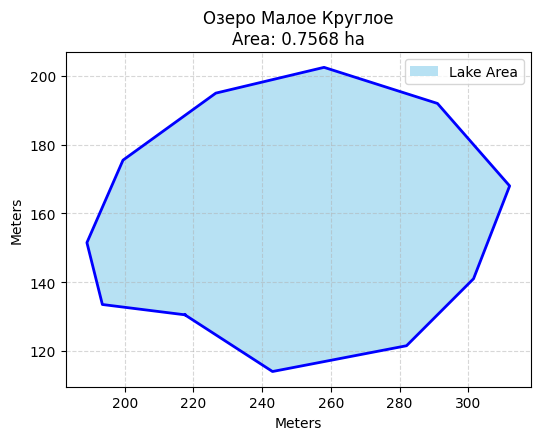

In [24]:
def solve_lake_task(name, coords_pixels, resolution, threshold_hectares):
    coords_meters = [Point(x * resolution, y * resolution) for x, y in coords_pixels]
    lake_polygon = Polygon(coords_meters)
    area_sq_m = lake_polygon.area()
    area_hectares = area_sq_m / 10000
    
    print(f"Object: {name}")
    print(f"Area: {area_sq_m:.2f} m²")
    print(f"Area: {area_hectares:.4f} ha")
    classification = 'Large Water Body' if area_hectares >= threshold_hectares else 'Small Lake'
    print(f"Classification: {classification} (Threshold: {threshold_hectares} ha)")
    
    fig, ax = plt.subplots(figsize=(6, 6))
    x_vals = [p.x for p in coords_meters]
    y_vals = [p.y for p in coords_meters]
    
    ax.fill(x_vals, y_vals, 'skyblue', alpha=0.6, label='Lake Area')
    ax.plot(x_vals + [x_vals[0]], y_vals + [y_vals[0]], 'b-', linewidth=2)
    ax.set_aspect('equal')
    ax.set_title(f"{name}\nArea: {area_hectares:.4f} ha")
    ax.set_xlabel("Meters")
    ax.set_ylabel("Meters")
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

variant1 = {
    "name": "Озеро Малое Круглое",
    "coords": [(145, 87), (162, 76), (188, 81), (201, 94), (208, 112), (194, 128), (172, 135), (151, 130), (133, 117), (126, 101), (129, 89)],
    "resolution": 1.5,
    "threshold": 5
}
solve_lake_task(variant1["name"], variant1["coords"], variant1["resolution"], variant1["threshold"])